# Analysis of the Scraping Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_excel('results/merged_papers.xlsx')

In [5]:
df.head(2)

,Title,Source,Year,Abstract,URL,is_relevent,Attack,Defense,Robustness,Training,Testing,Competitive,Cooperative,AttackAgainstCommunication,BlackBox,WhiteBox,GreyBox,Comments,Q Index
0,Robust cooperative multi-agent reinforcement l...,Science China Information Sciences,2024,Many multi-agent scenarios require message sha...,https://link.springer.com/article/10.1007/s114...,1,0,1,1,1,0,0,1,1,0,0,0,The abstract discusses a method for robust coo...,Q1
1,Weaponizing actions in multi-agent reinforceme...,PRIMA,2022,Cooperative Multi-Agent Reinforcement Learning...,https://link.springer.com/chapter/10.1007/978-...,1,1,0,1,0,0,1,1,1,0,0,0,The paper focuses on the robustness of c-MARL ...,B


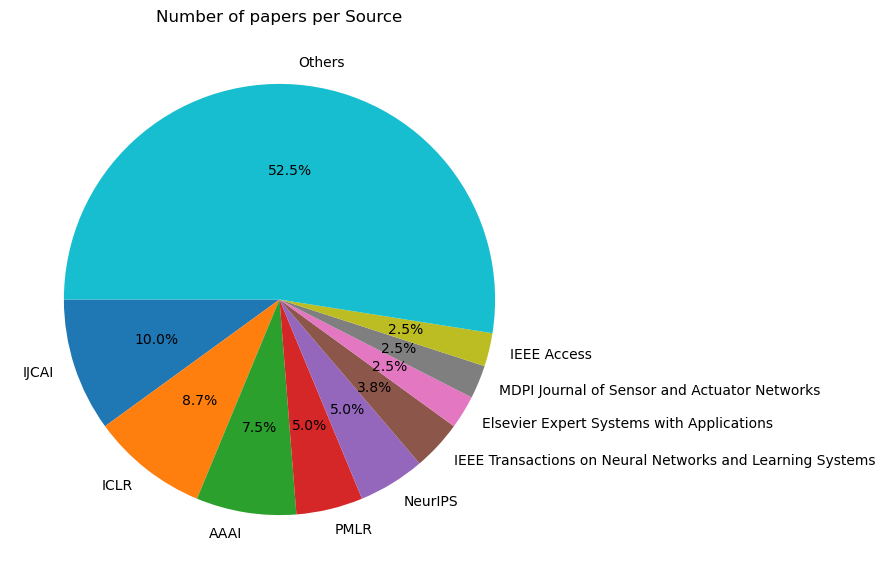

In [68]:
# pie chart of the number of papers per Source, show the sources with less than 2 papers as 'Others'
n_df = df['Source'].value_counts()
n_df['Others'] = sum(n_df[n_df < 2])
n_df = n_df[n_df >= 2]

plt.figure(figsize=(7, 7))
plt.pie(n_df, labels=n_df.index, autopct='%1.1f%%', startangle=180)
plt.title('Number of papers per Source')
plt.show()

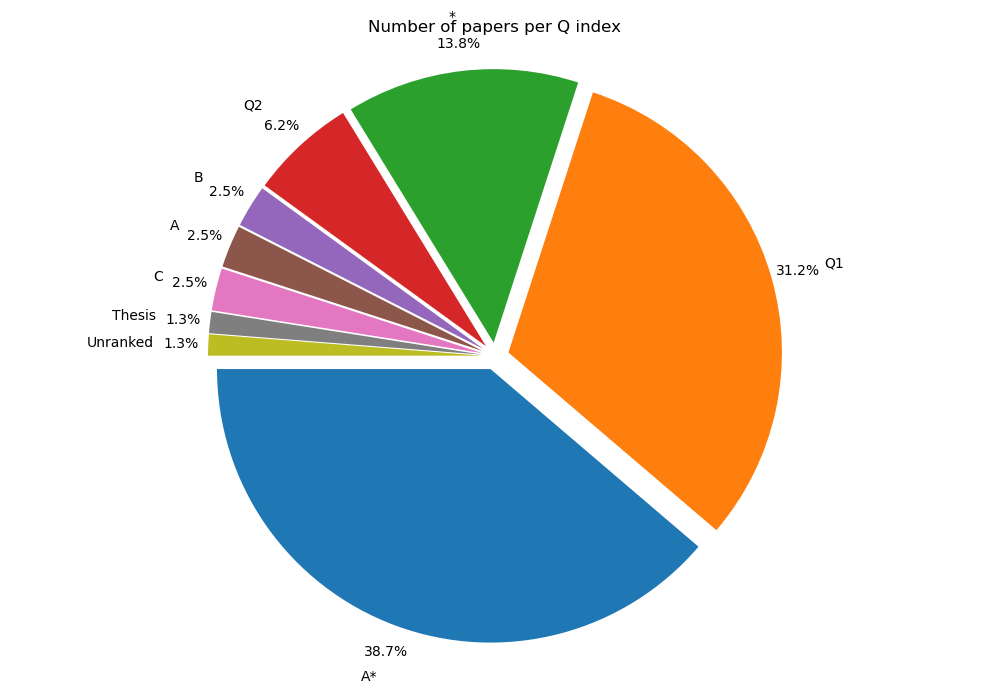

In [65]:
# draw pie chart of the number of papers per Q index without creating a new dataframe
sizes = df['Q Index'].value_counts()
labels = sizes.index
fig1, ax1 = plt.subplots()
explode = [0.05] * 9  # only "explode" the 1st slice
# set size of the pie chart
fig1.set_size_inches(10, 7)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, pctdistance=1.1, labeldistance=1.2, explode=explode)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')
plt.title('Number of papers per Q index')
plt.tight_layout()
plt.show()

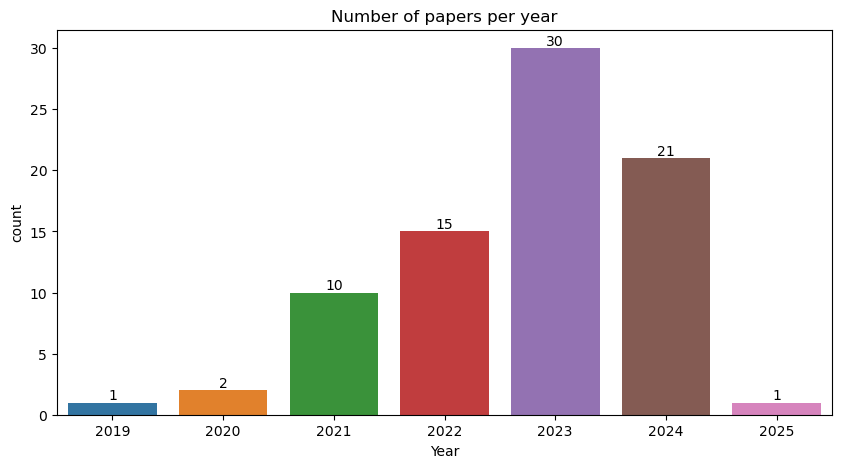

In [87]:
# barplot of the number of papers per year
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Year')
# add number of papers per year on top of each bar
for i in range(len(df['Year'].value_counts(sort=False).index)):
    plt.text(i, df['Year'].value_counts(sort=False).values[i], df['Year'].value_counts(sort=False).values[i], ha='center', va='bottom')
plt.title('Number of papers per year')
plt.show()

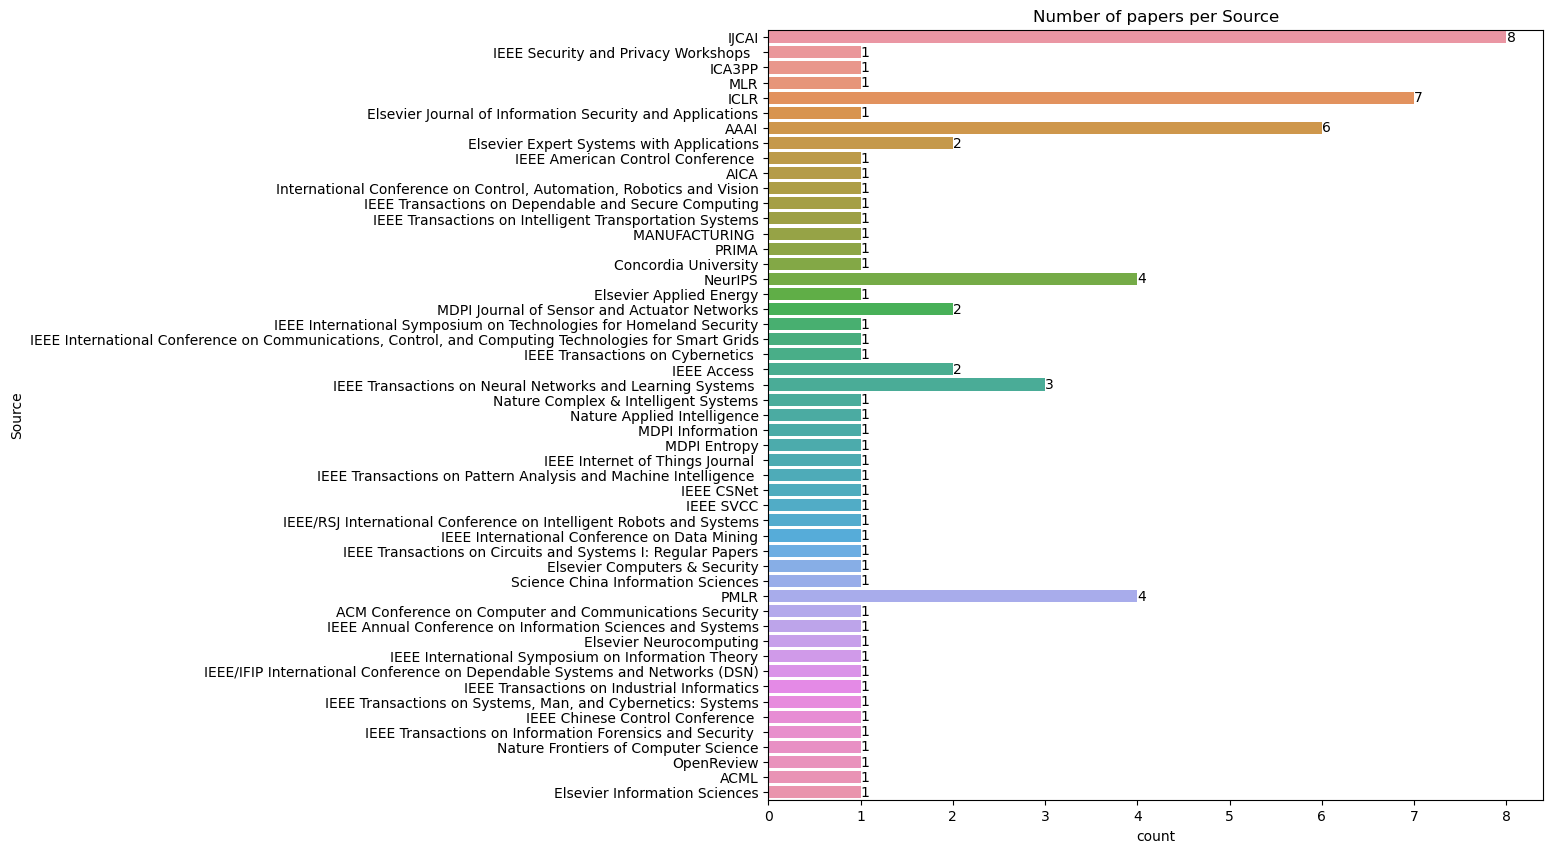

In [96]:
# barplot of the number of papers per Source
plt.figure(figsize=(10, 10))
sns.countplot(data=df, y='Source')
# add number of papers per Source on the right of each bar
for i in range(len(df['Source'].value_counts(sort=False).index)):
    plt.text(df['Source'].value_counts(sort=False).values[i]+0.05, i, df['Source'].value_counts(sort=False).values[i], ha='center', va='center')
plt.title('Number of papers per Source')
plt.show()

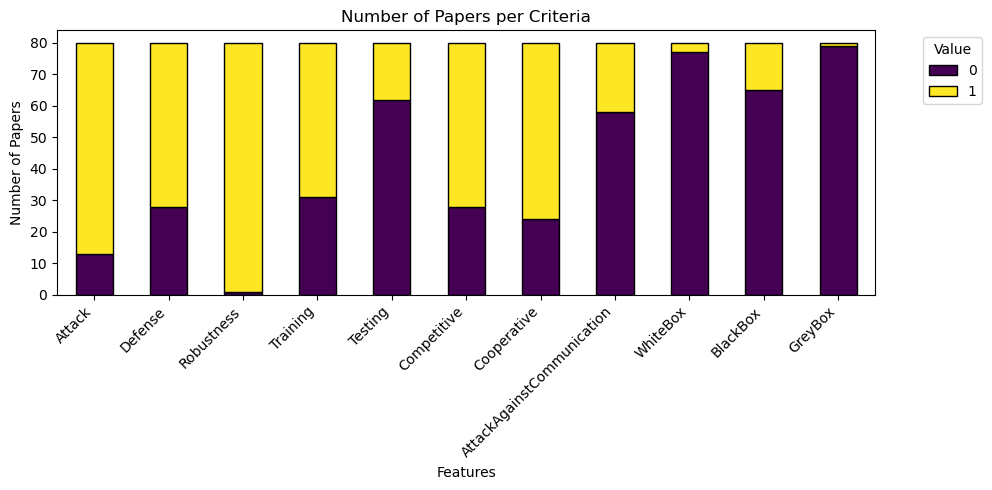

In [114]:
# Prepare data for stacked bar plot
features = [
    'Attack', 'Defense', 'Robustness', 'Training', 'Testing',
    'Competitive', 'Cooperative', 'AttackAgainstCommunication',
    'WhiteBox', 'BlackBox', 'GreyBox'
]

# Count the occurrences for each feature
counts = {feature: df[feature].value_counts() for feature in features}
count_df = pd.DataFrame(counts).fillna(0).astype(int)

# Create a stacked bar plot
count_df.T.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 5), 
    colormap='viridis',
    edgecolor='black'
)

plt.title("Number of Papers per Criteria")
plt.ylabel("Number of Papers")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Value", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()